In [1]:
import numpy as np
import mne
from matplotlib.collections import LineCollection

In [2]:
from scipy import signal

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ritwik\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
data=np.load('bci_3.npz')
data['events']

array([[-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],

In [6]:
data['X'].shape

(278, 64, 3000)

In [7]:
data_2=data["X"]
#data_2[0, 0, :]

In [8]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
  
# Create/view notch filter
samp_freq = 1000  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 20.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))


for i in range(data_2.shape[0]):
    for j in range(data_2.shape[1]):
        data_2[i, j, :] = signal.filtfilt(b_notch, a_notch, data_2[i,j,:])



<Figure size 576x432 with 0 Axes>

<ipython-input-9-5746e00a4044>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(15,5))


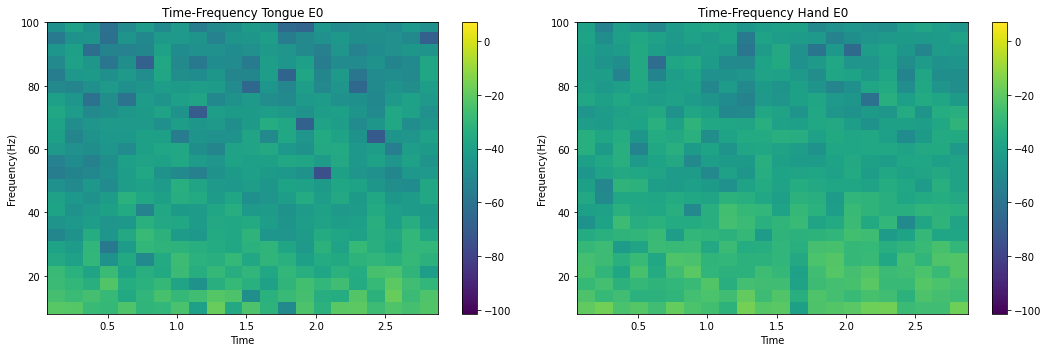

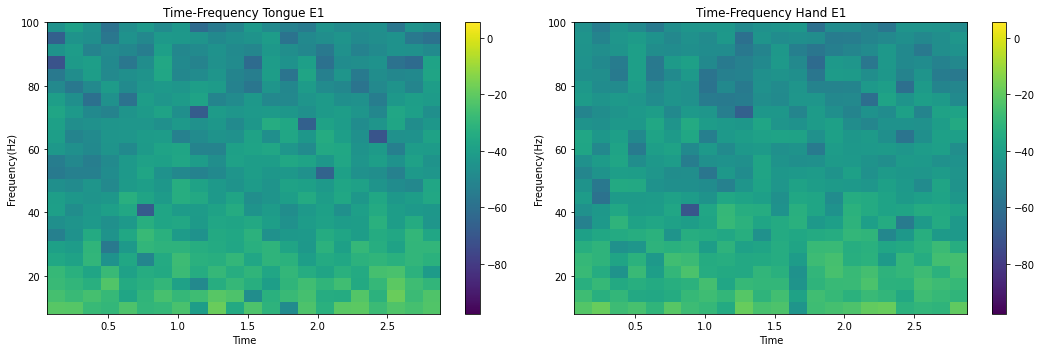

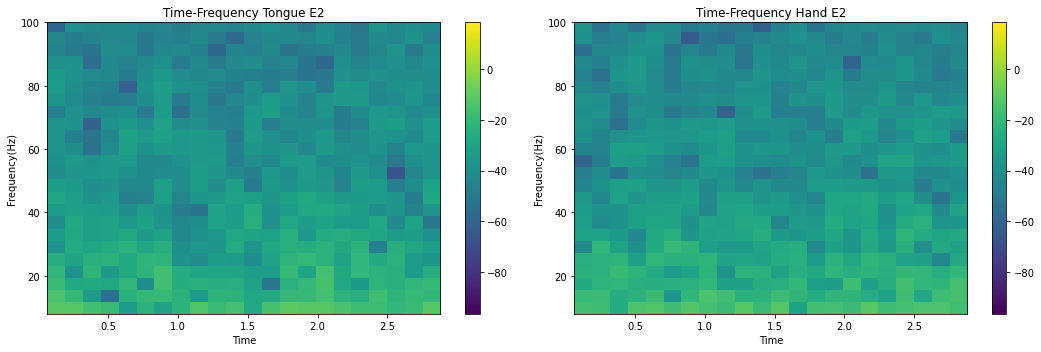

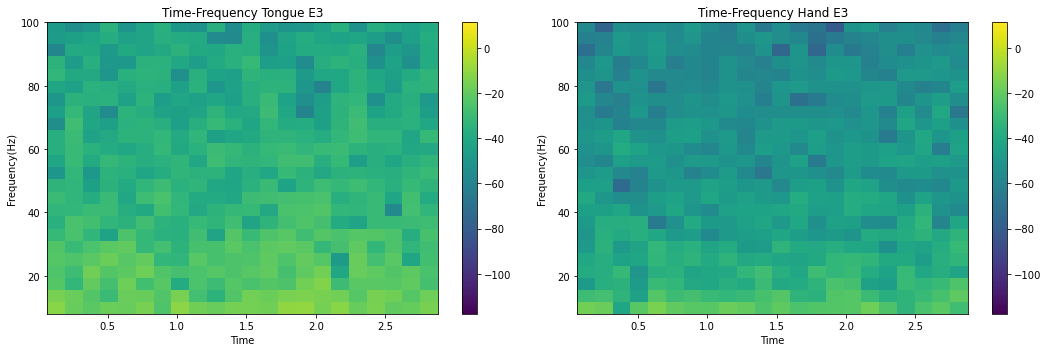

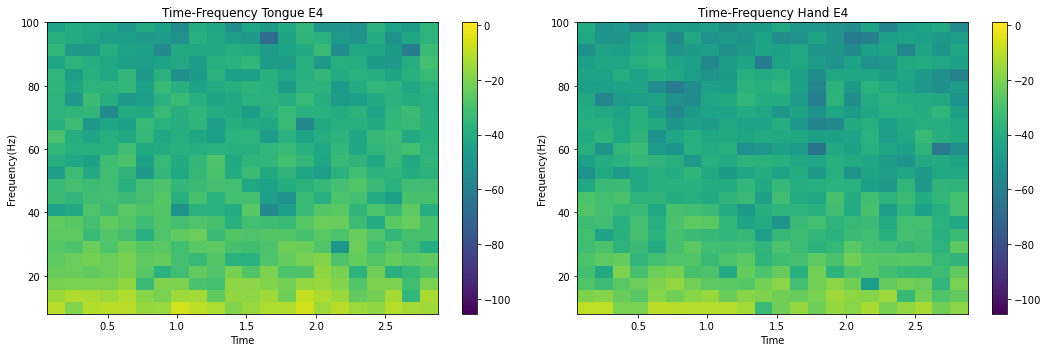

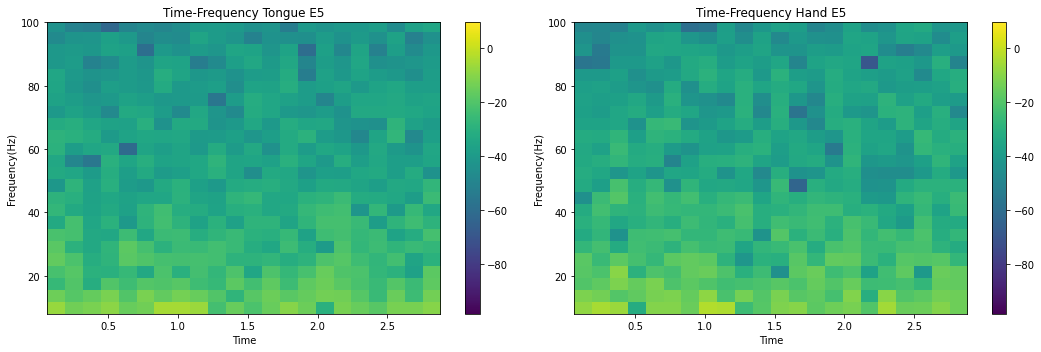

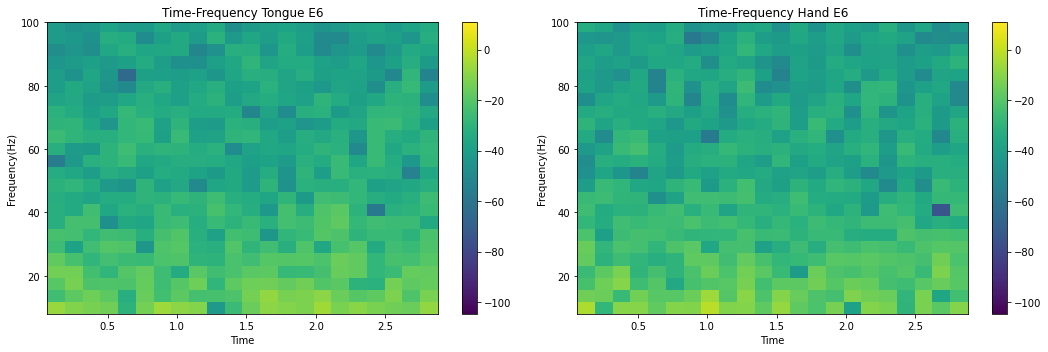

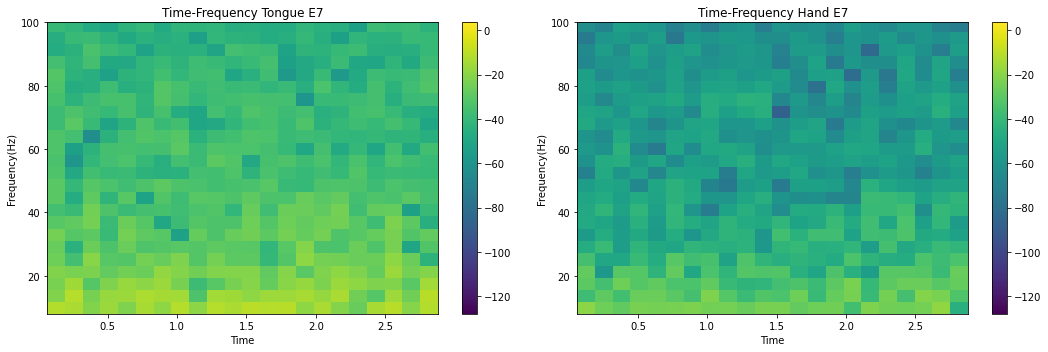

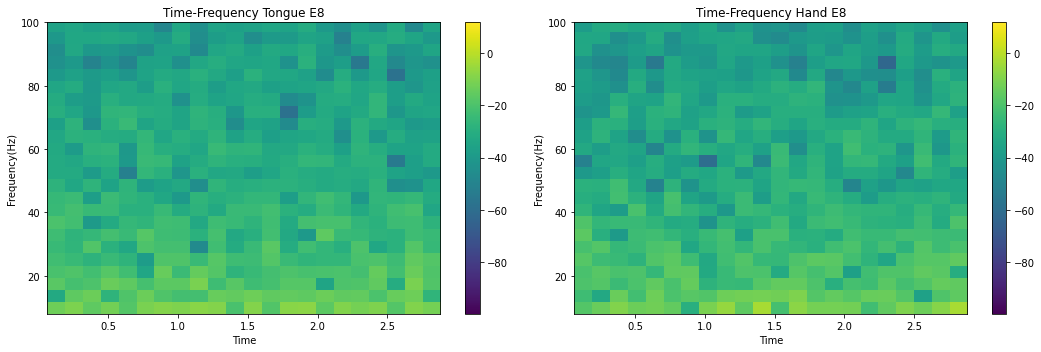

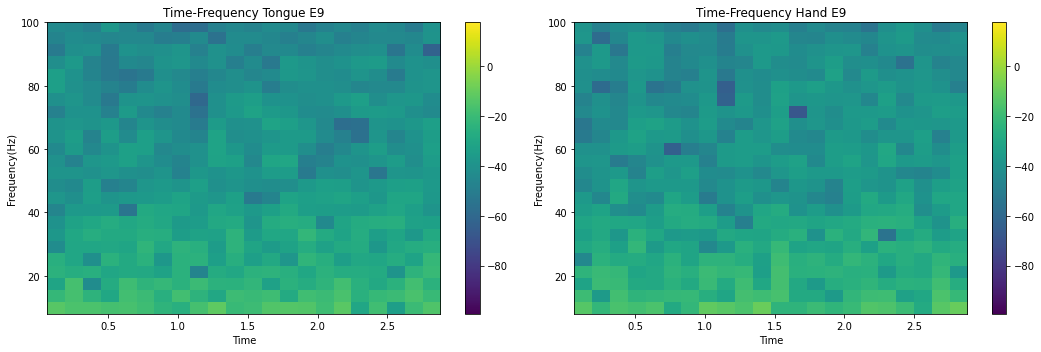

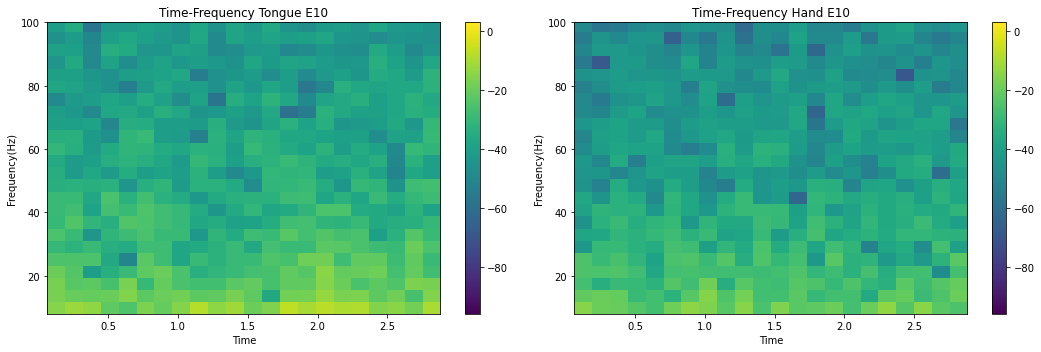

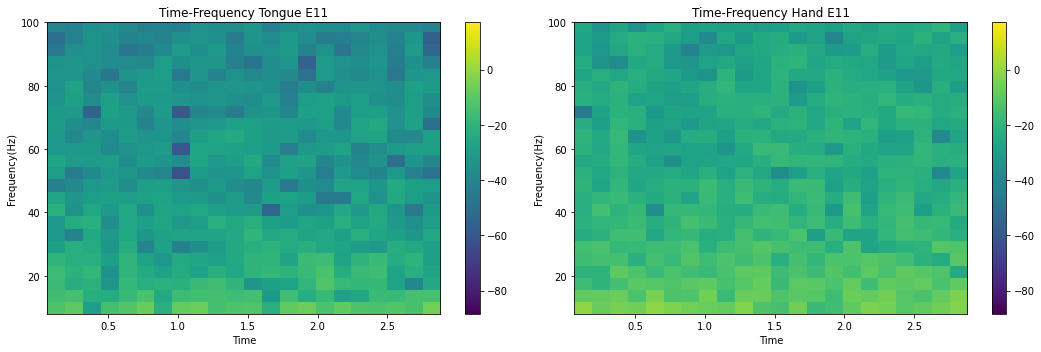

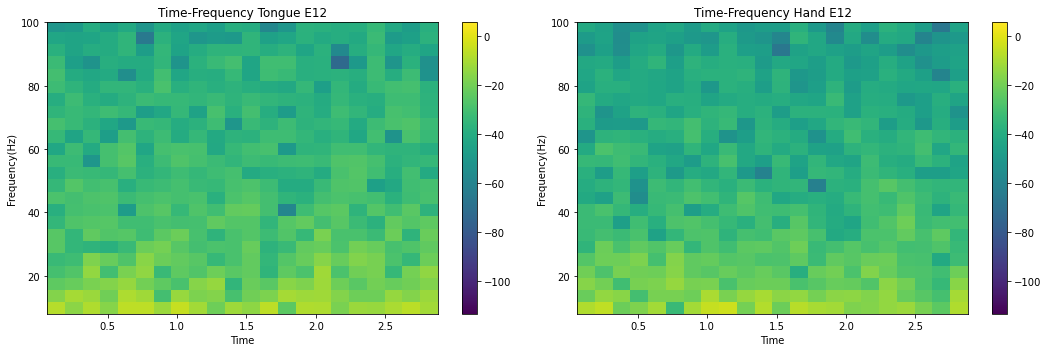

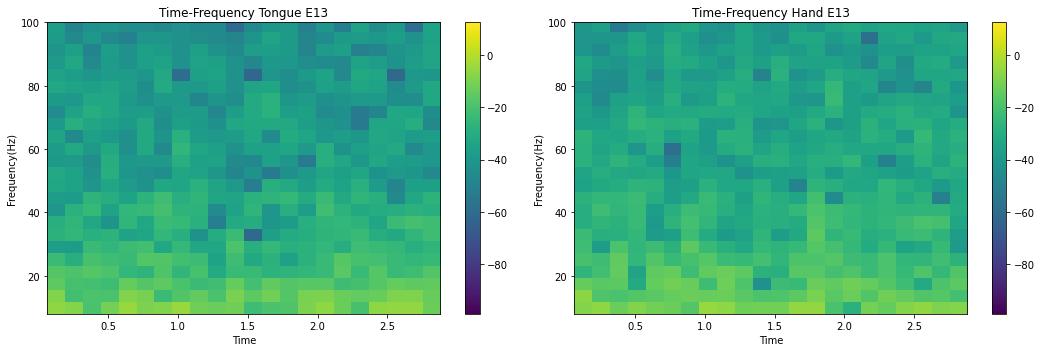

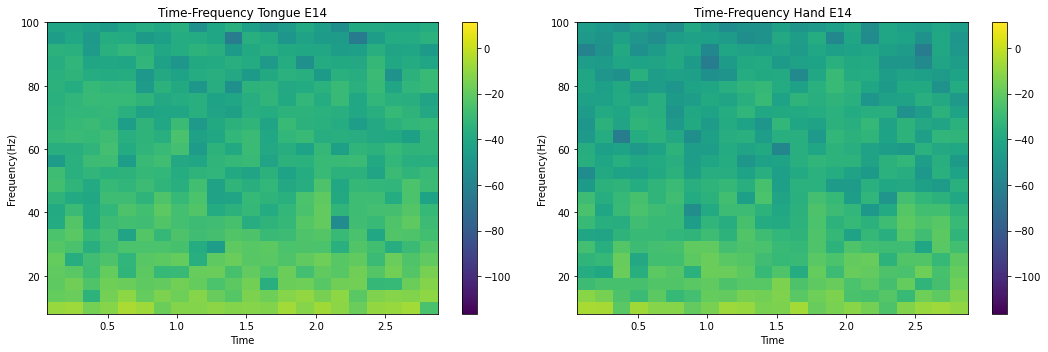

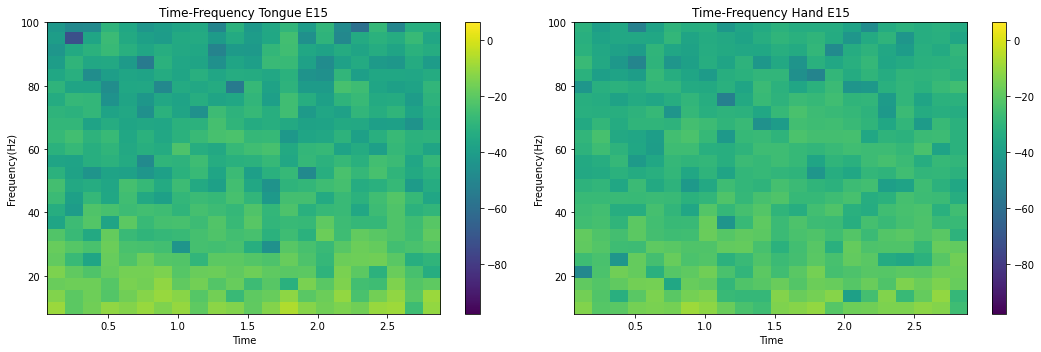

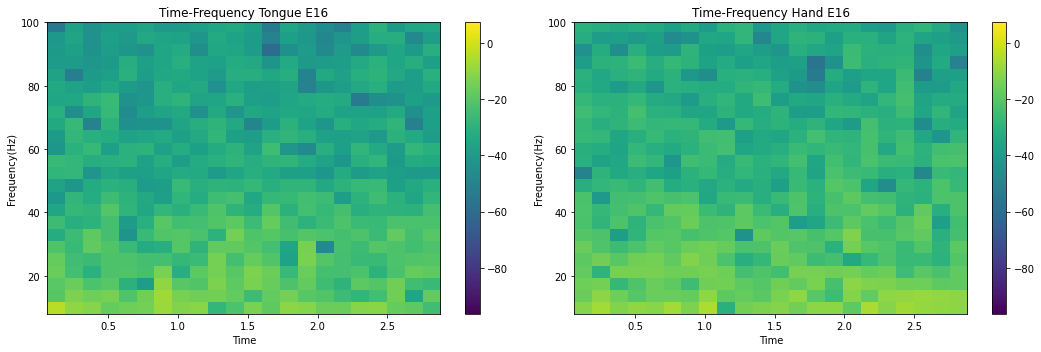

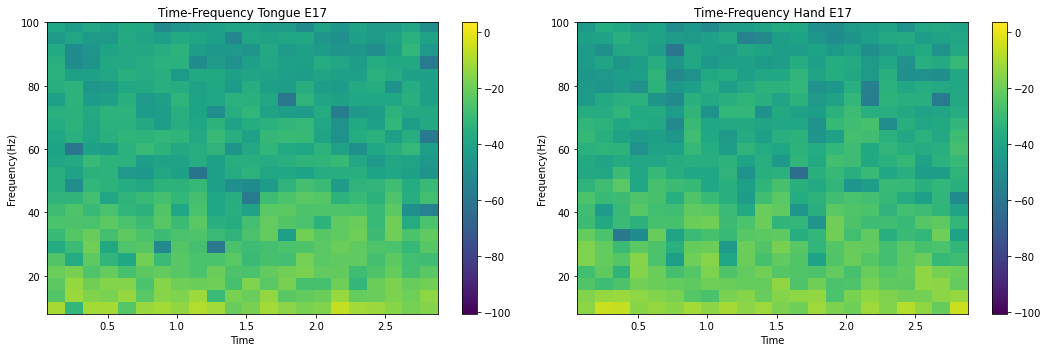

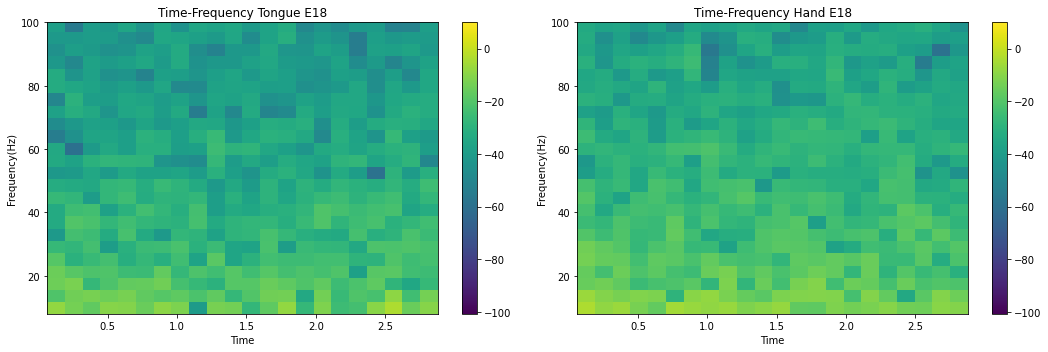

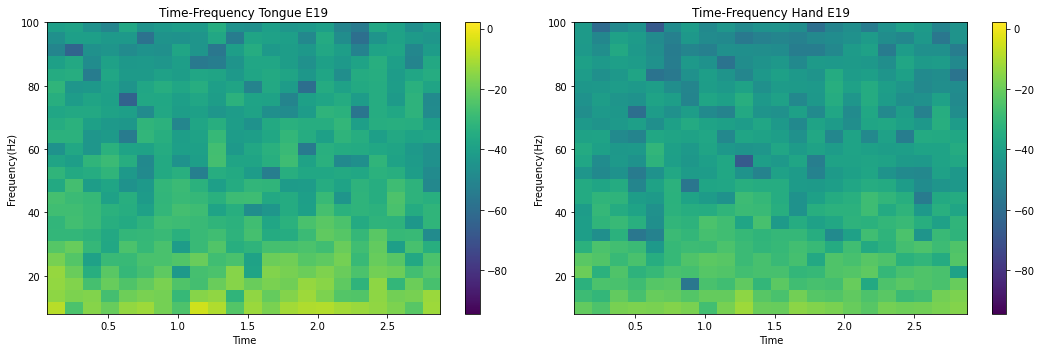

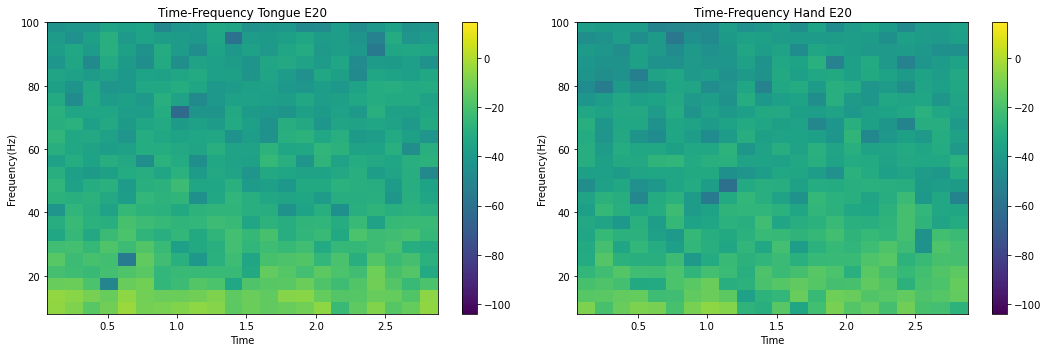

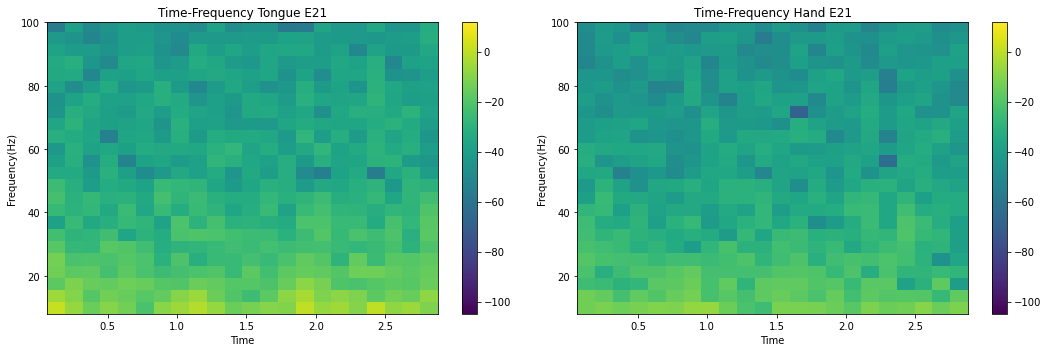

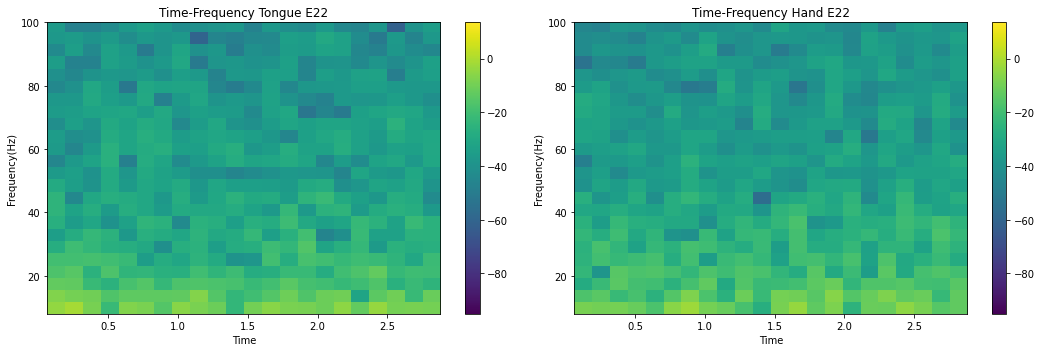

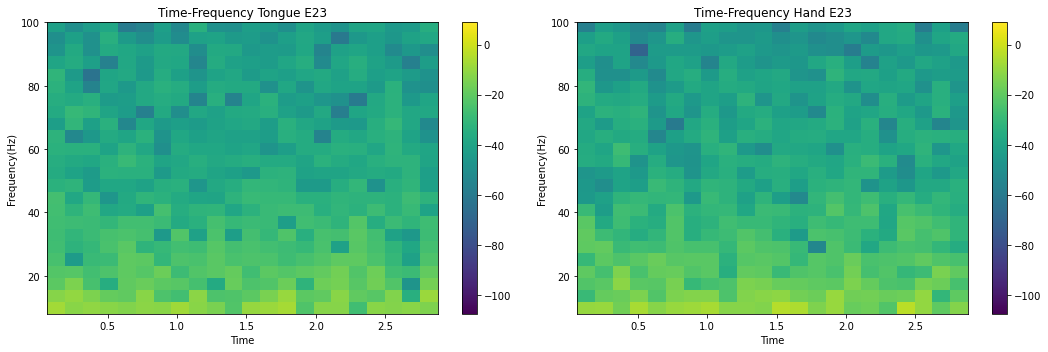

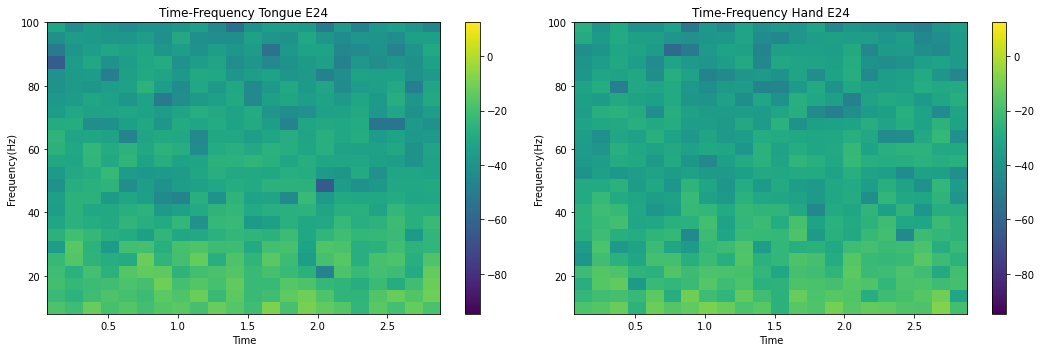

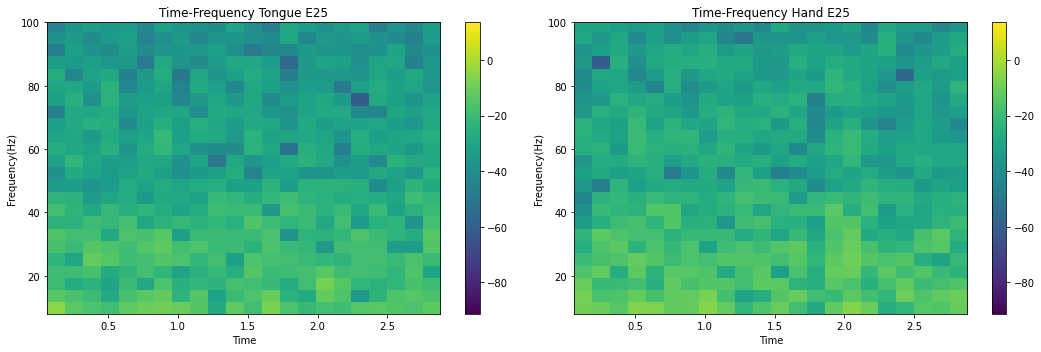

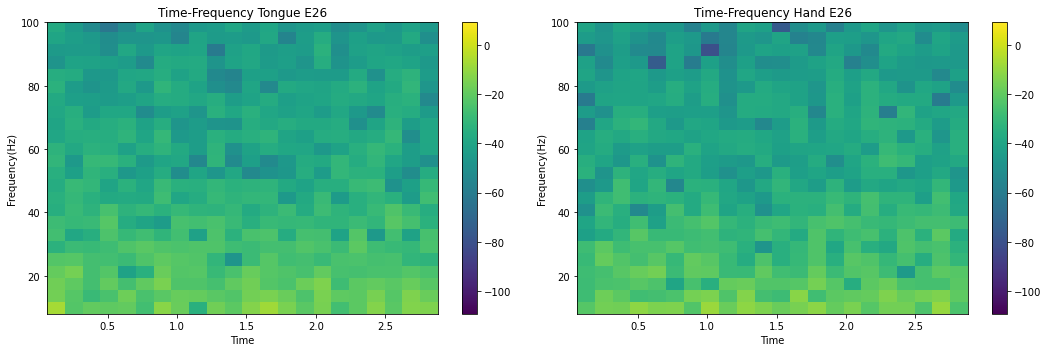

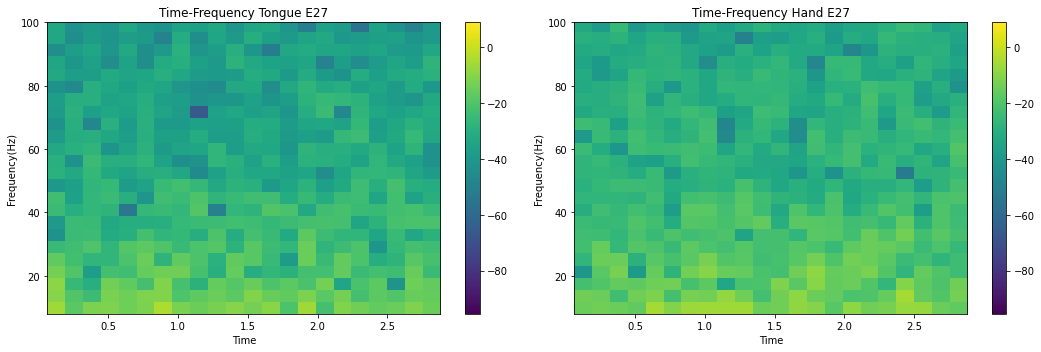

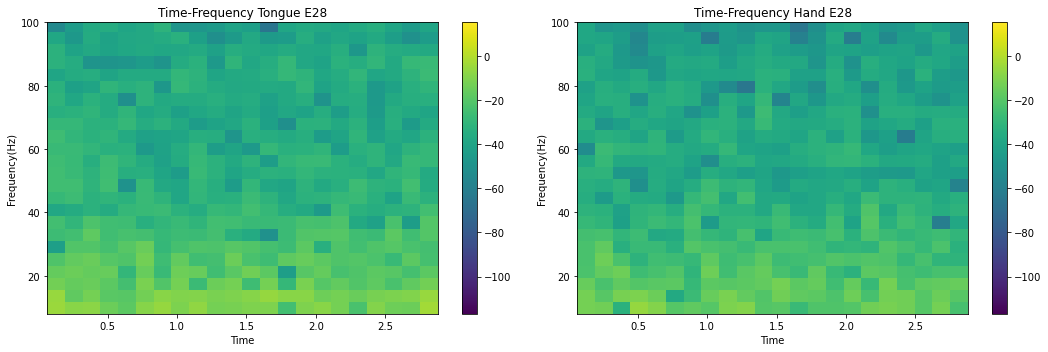

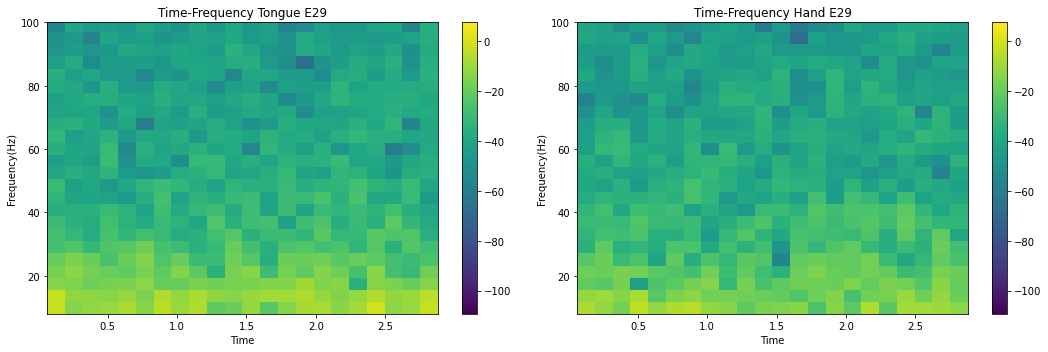

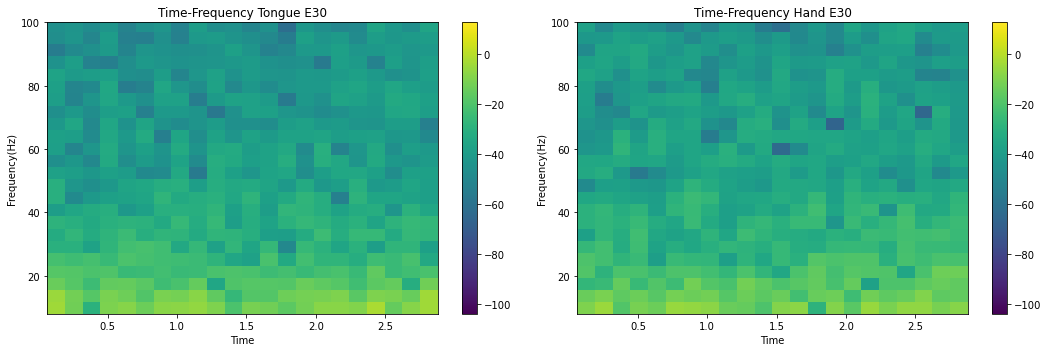

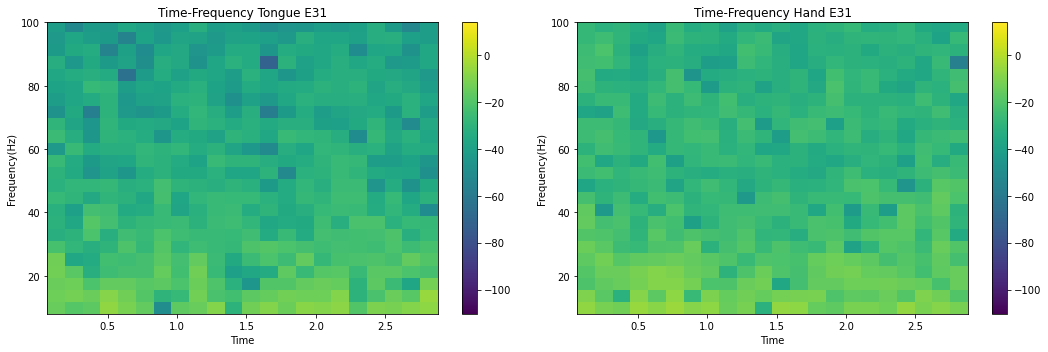

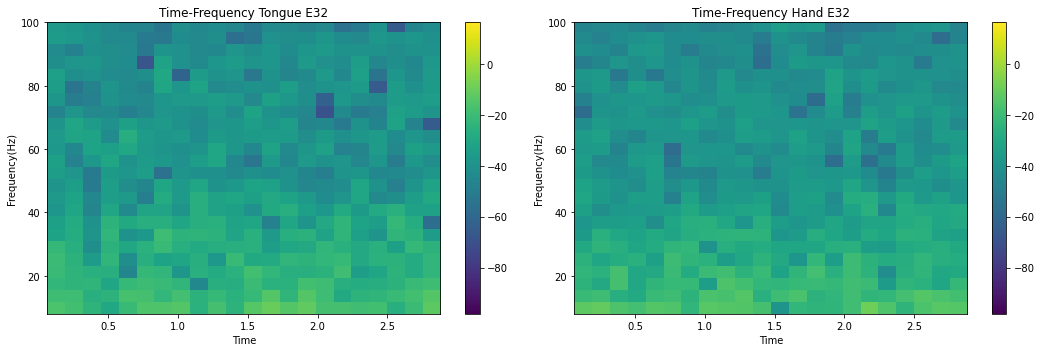

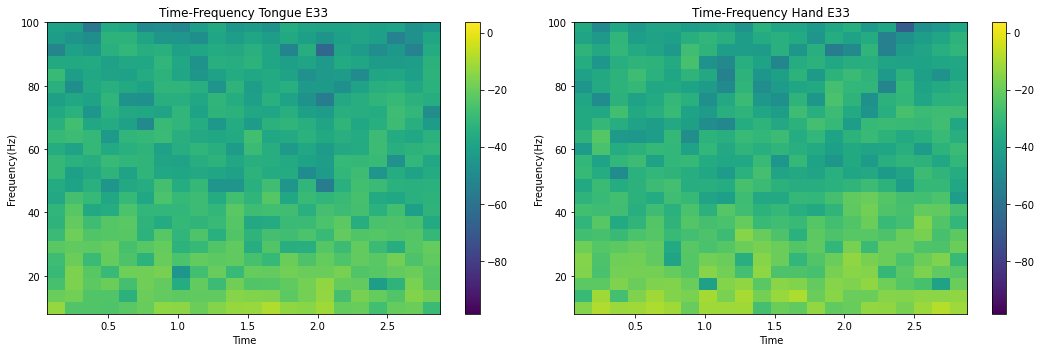

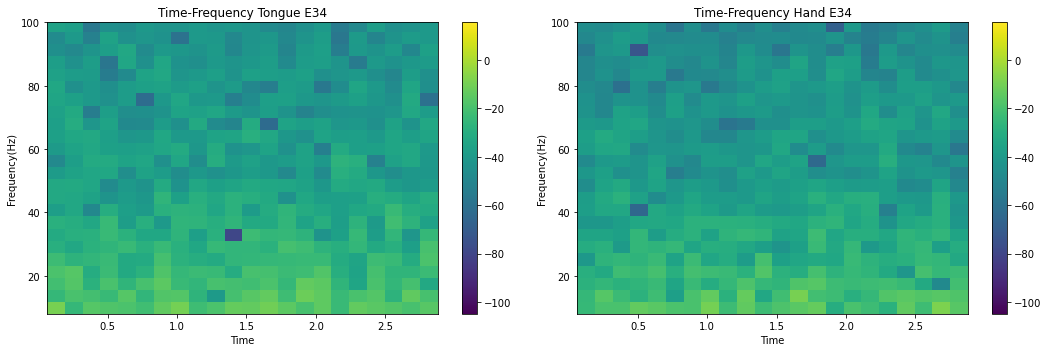

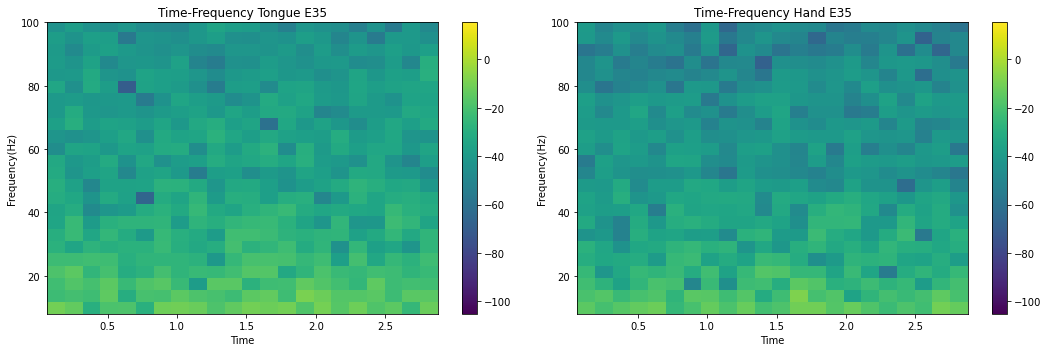

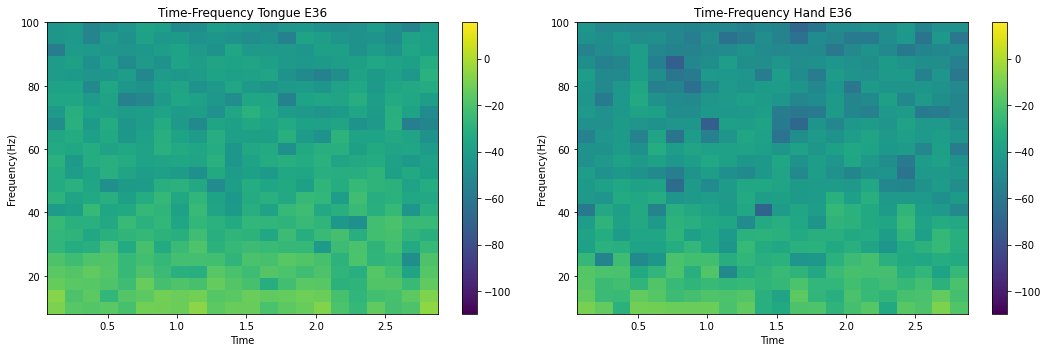

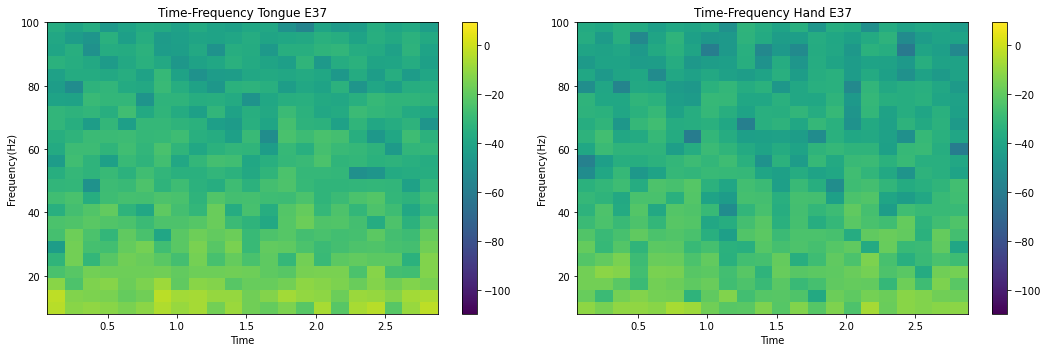

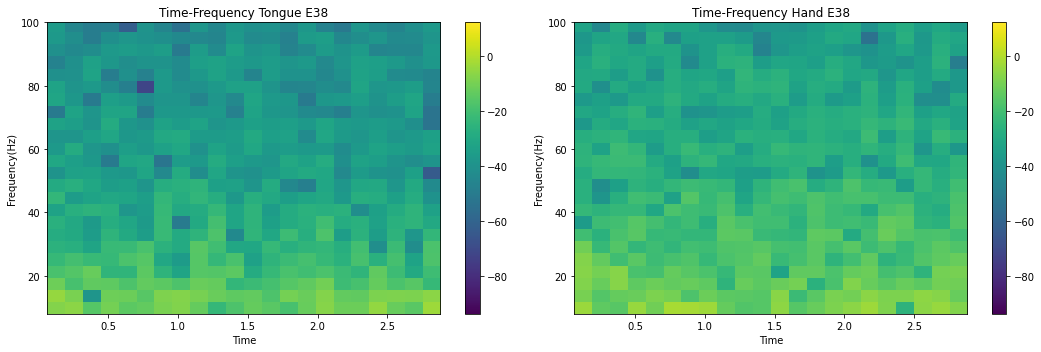

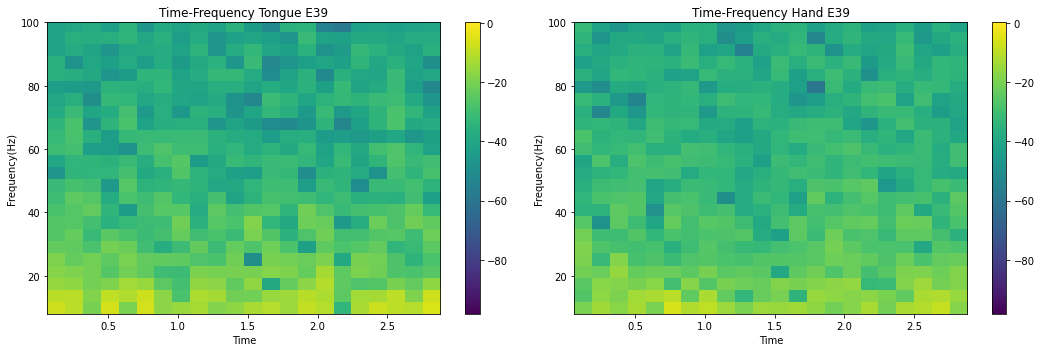

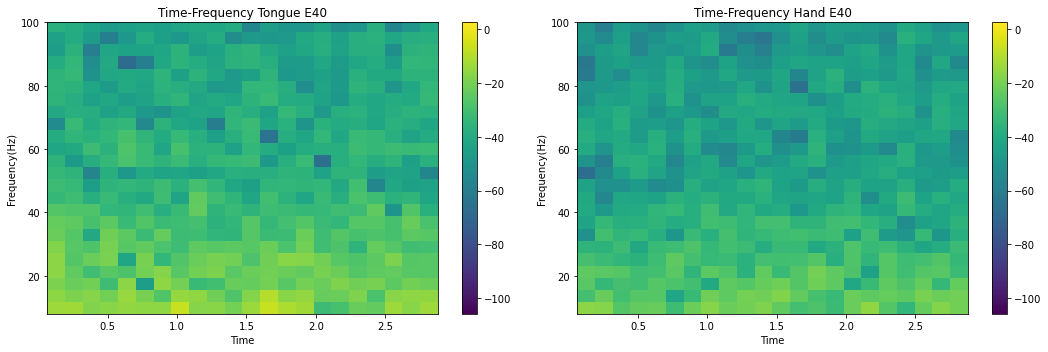

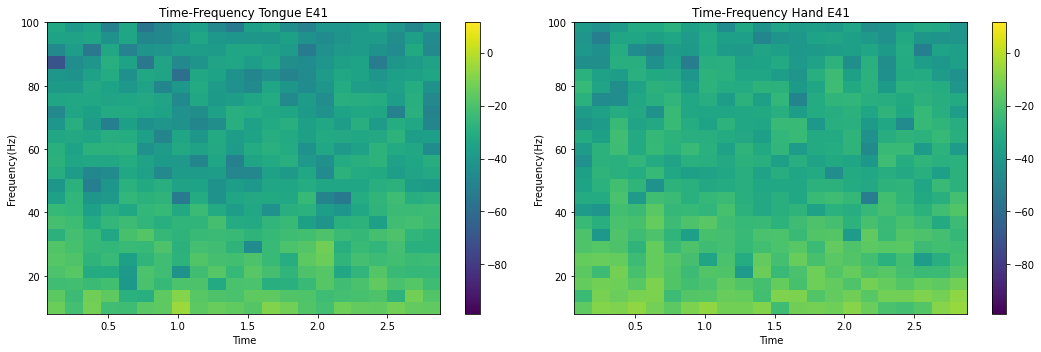

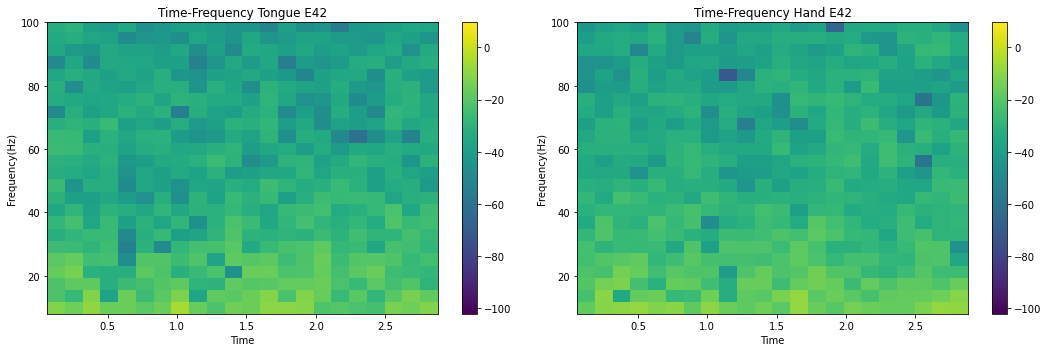

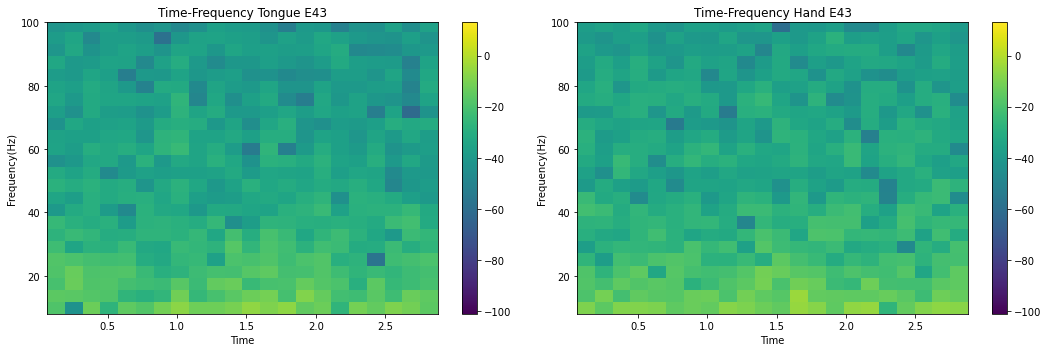

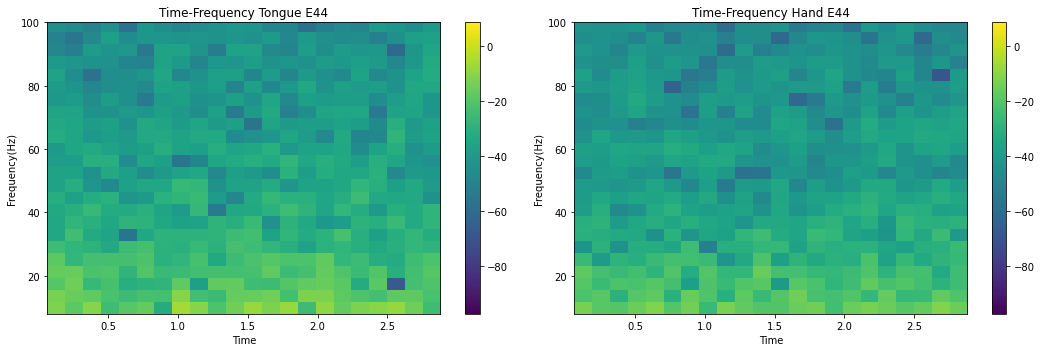

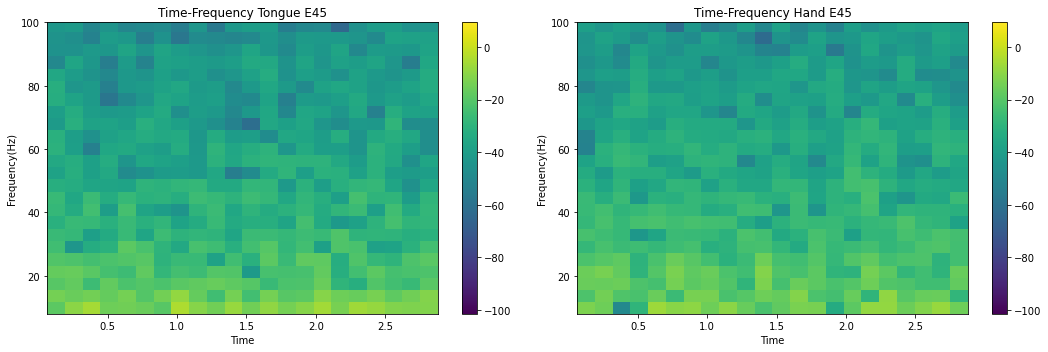

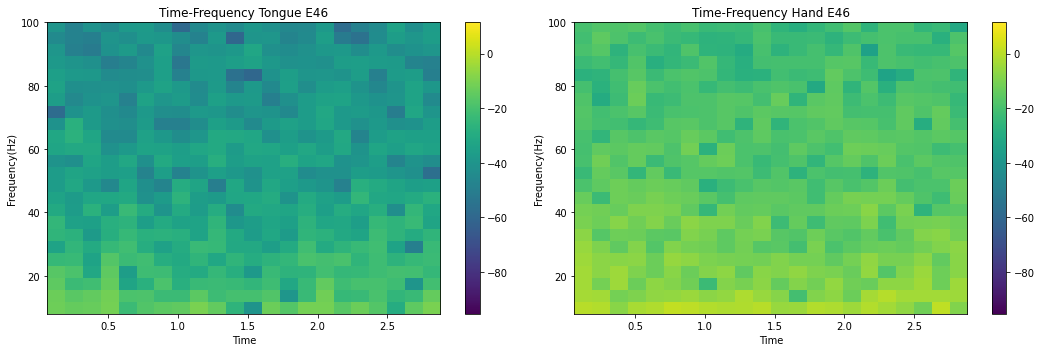

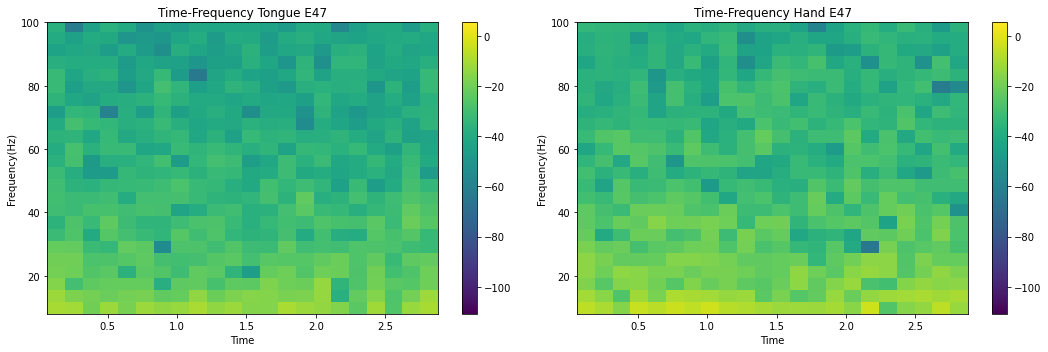

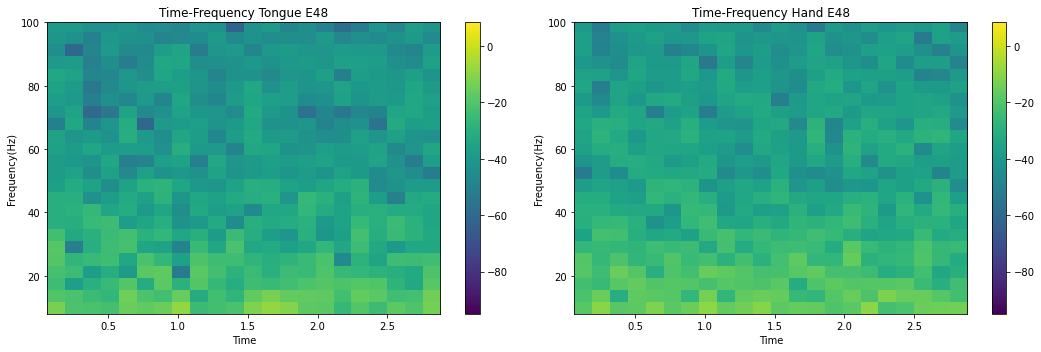

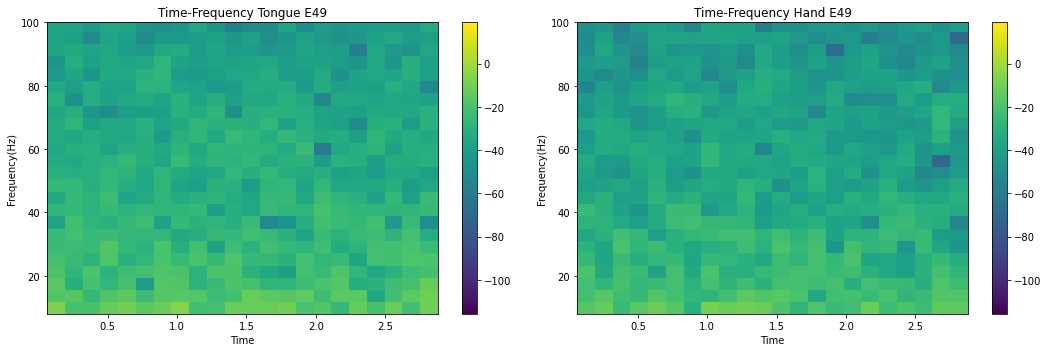

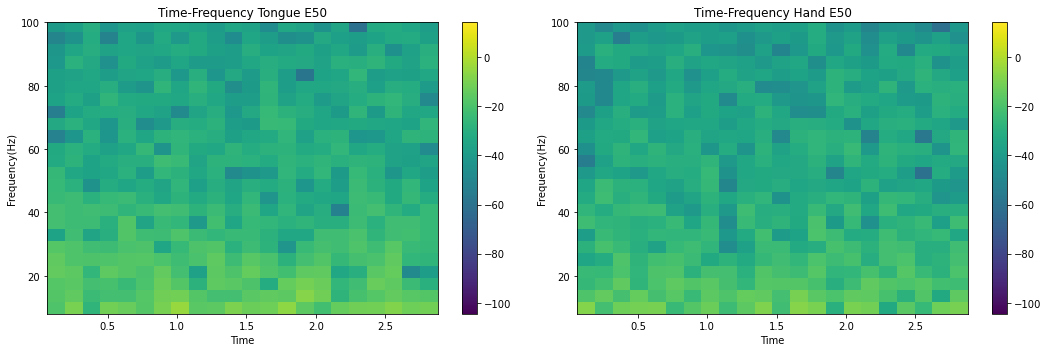

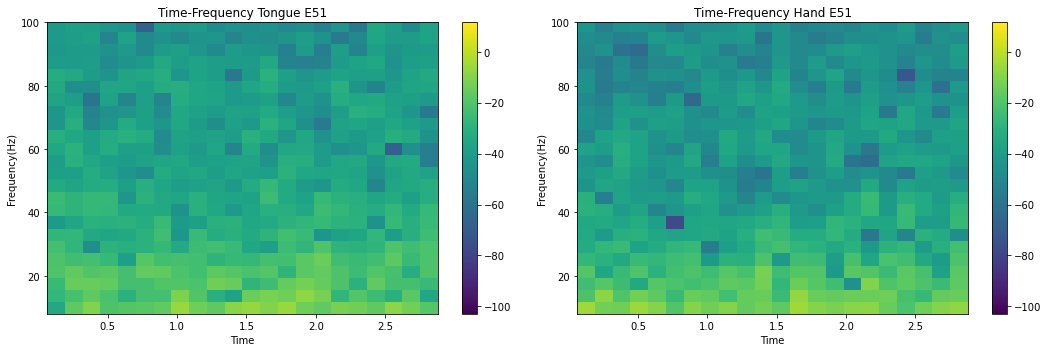

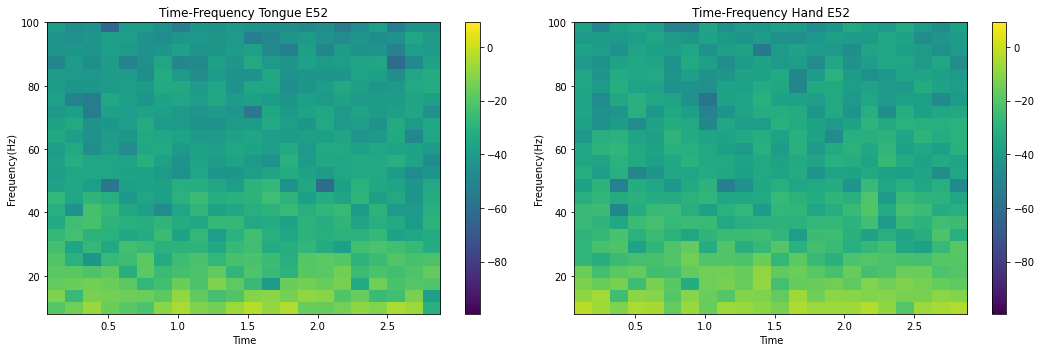

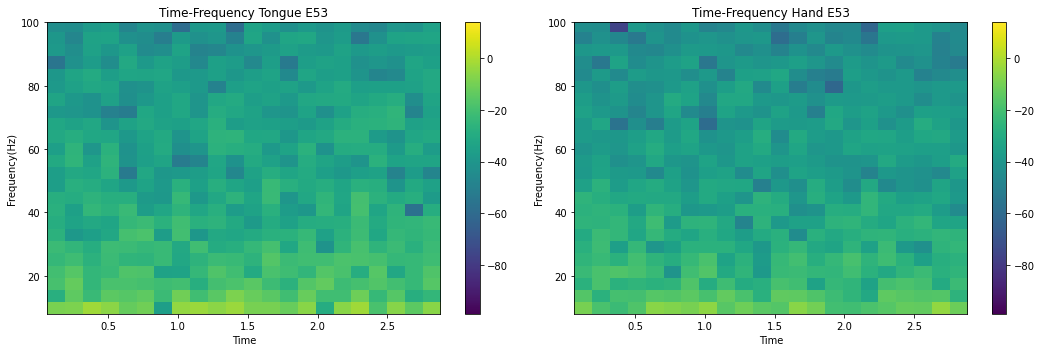

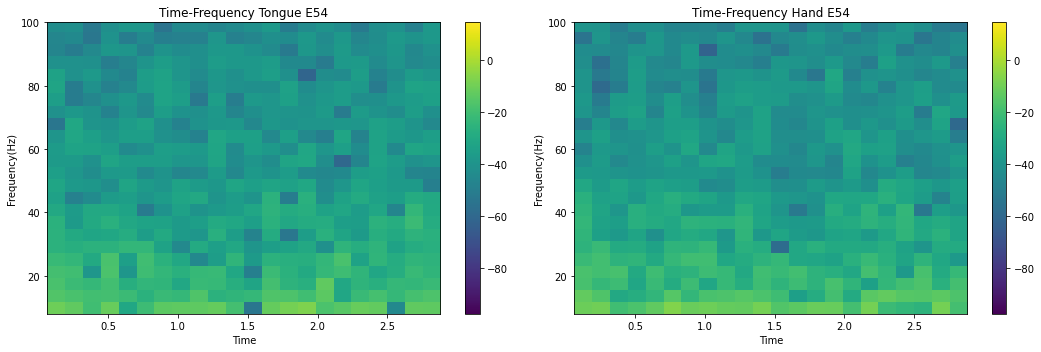

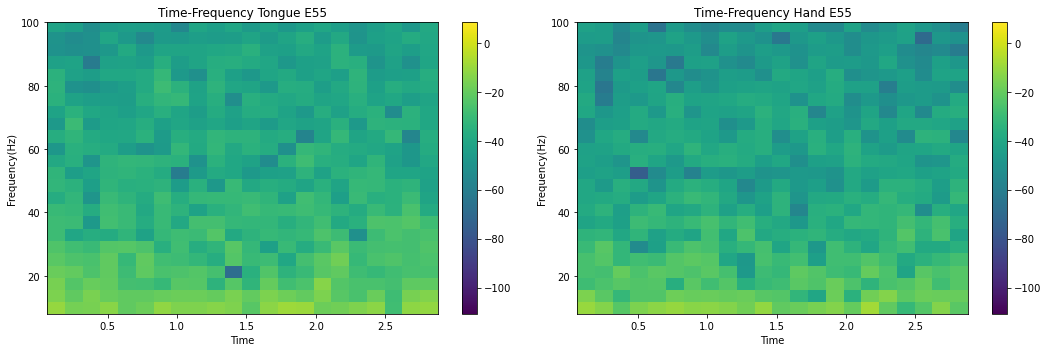

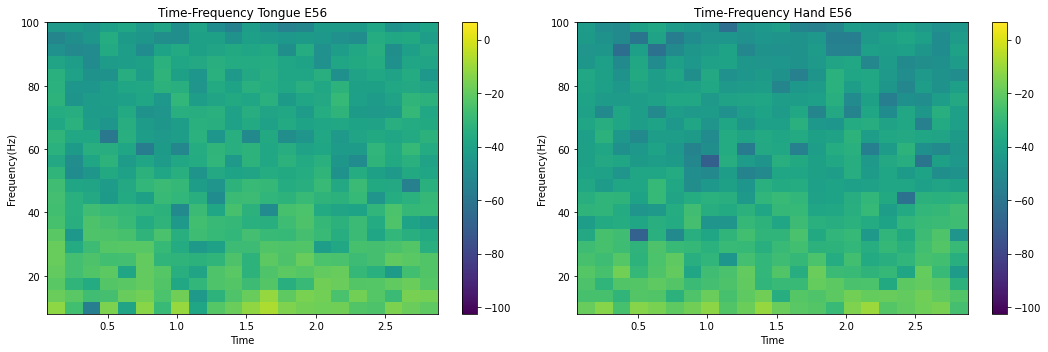

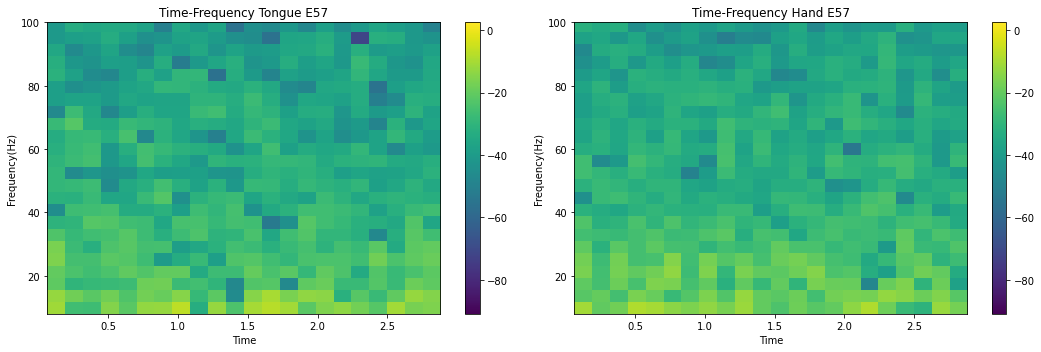

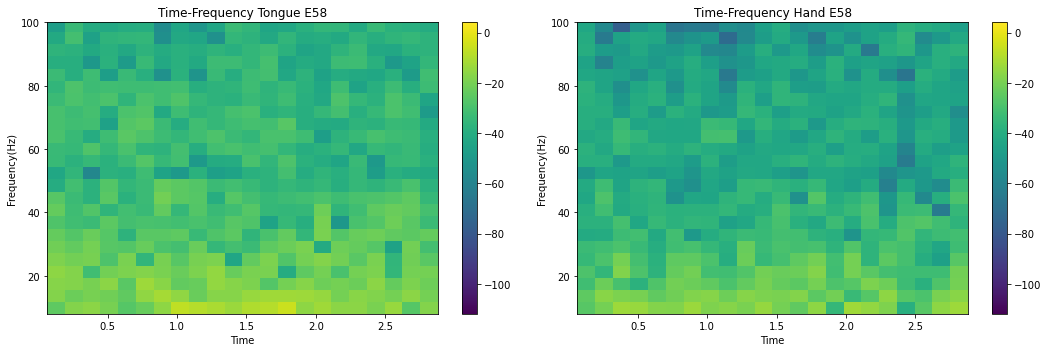

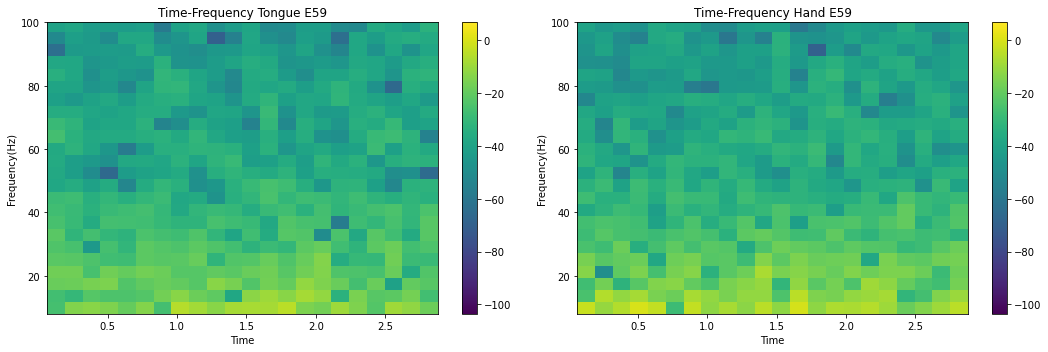

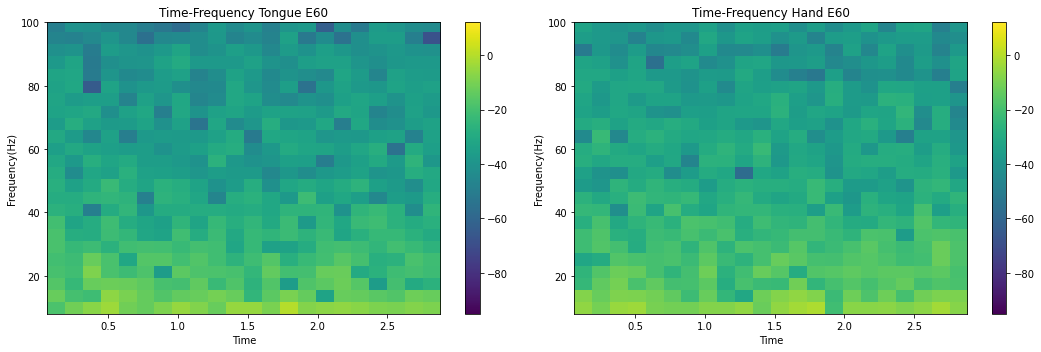

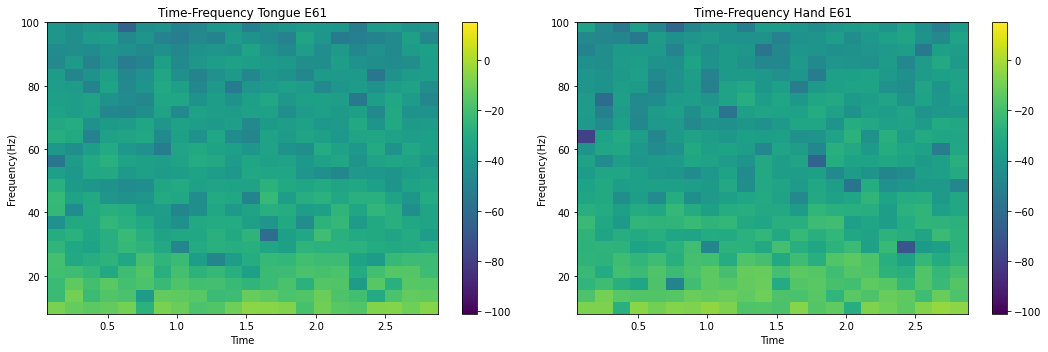

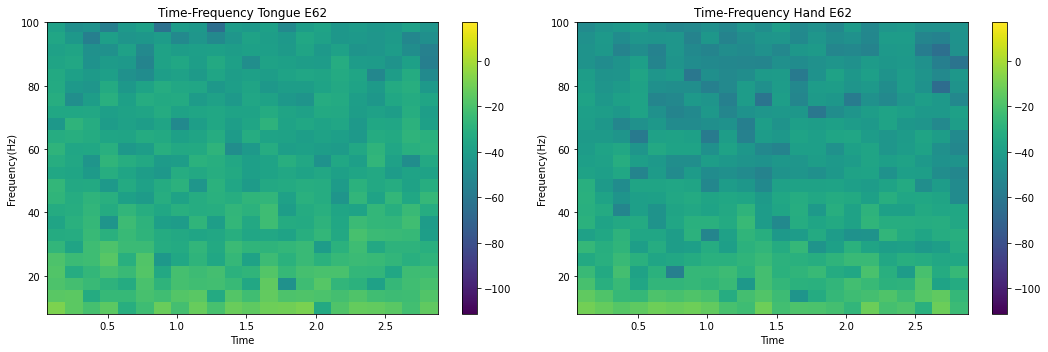

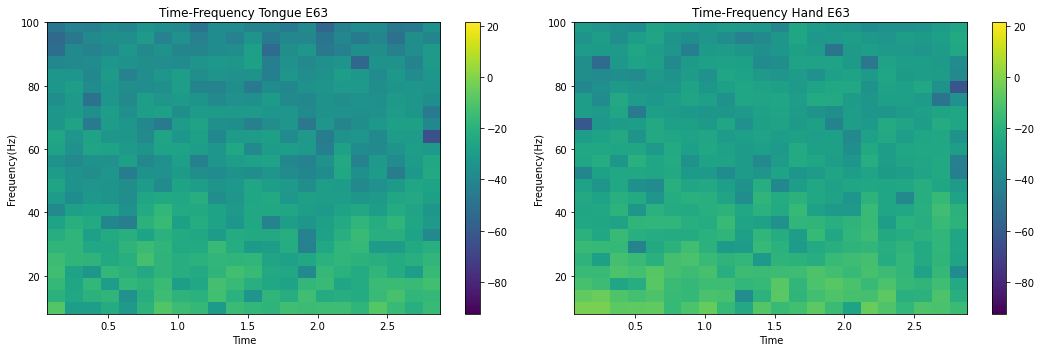

In [9]:
import matplotlib.pyplot as plot

for i in range(0,64):
    

    figure(figsize=(15,5))


    plt.subplot(1, 2, 1)
    
    plt.title("Time-Frequency Tongue E" + str(i))


    powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(np.mean(data_2[np.where(data["events"] == 1)[0], i, :], axis=0), Fs=1000)

    plot.xlabel('Time')

    plot.ylabel('Frequency(Hz)')
    
    #plot.clim(-3,3)

    plot.colorbar(imageAxis)

    plot.ylim((8,100))
    

    plt.subplot(1, 2, 2)
    
    plt.title("Time-Frequency Hand E" + str(i))

    powerSpectrum1, freqenciesFound1, time1, imageAxis1 = plot.specgram(np.mean(data_2[np.where(data["events"] == -1)[0], i, :], axis=0), Fs=1000)

    plot.xlabel('Time')

    plot.ylabel('Frequency(Hz)')
    
    #plot.clim(-3,3)

    plot.colorbar(imageAxis)

    plot.ylim((8,100))



    plot.tight_layout()




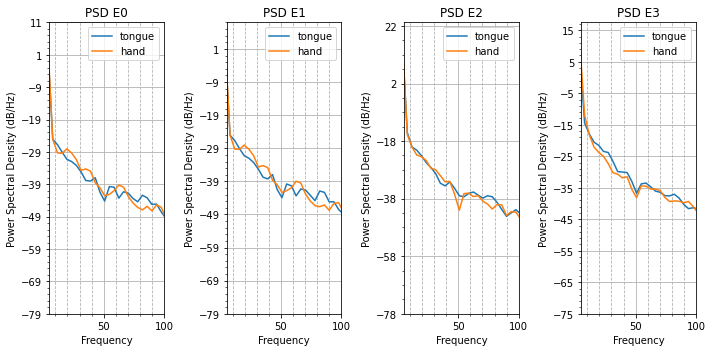

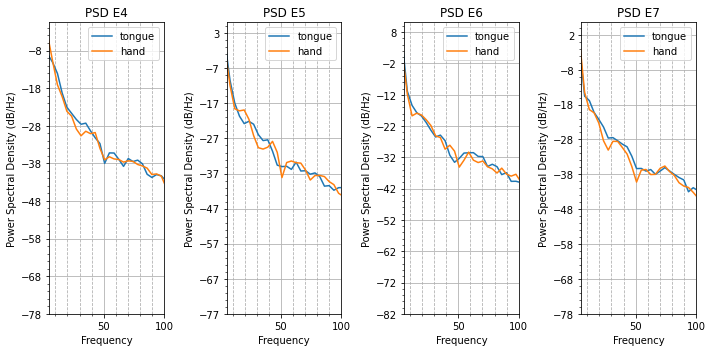

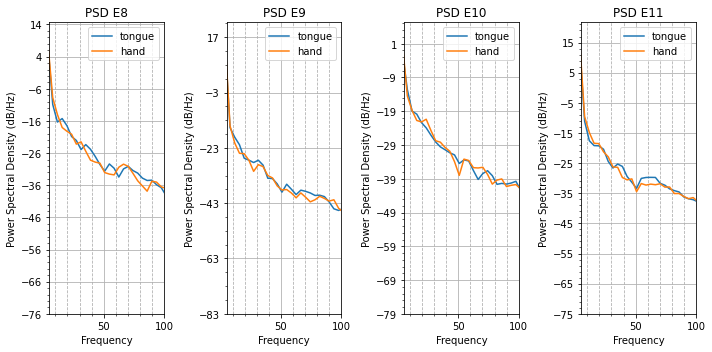

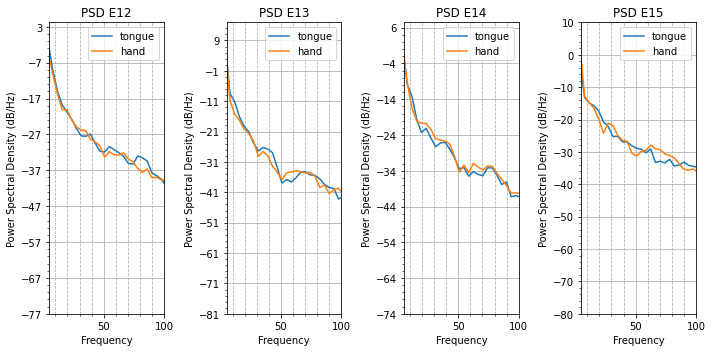

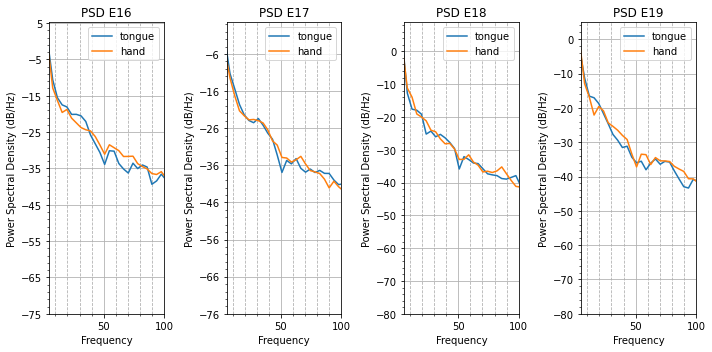

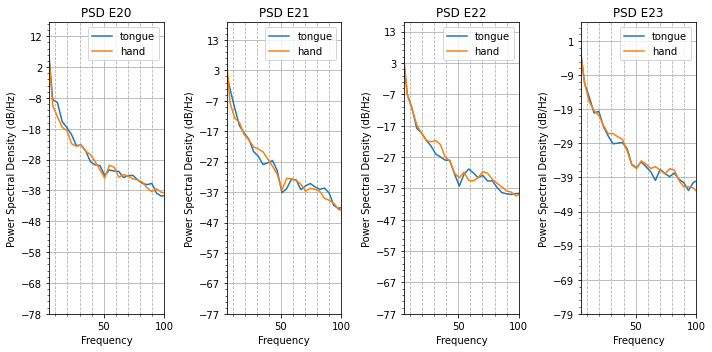

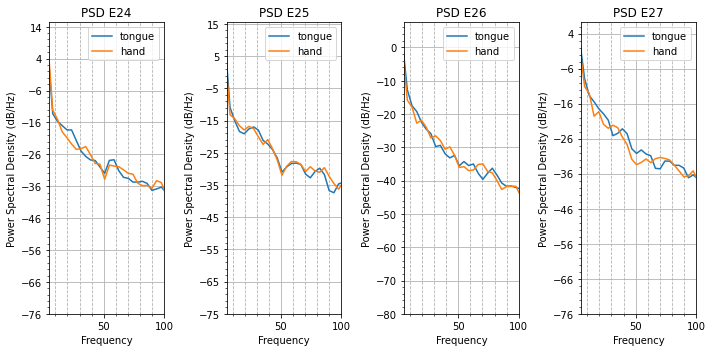

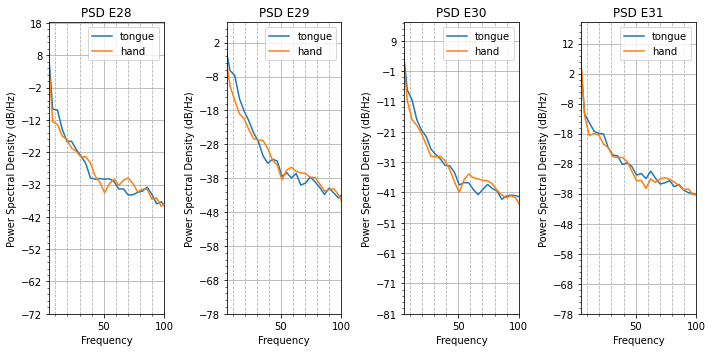

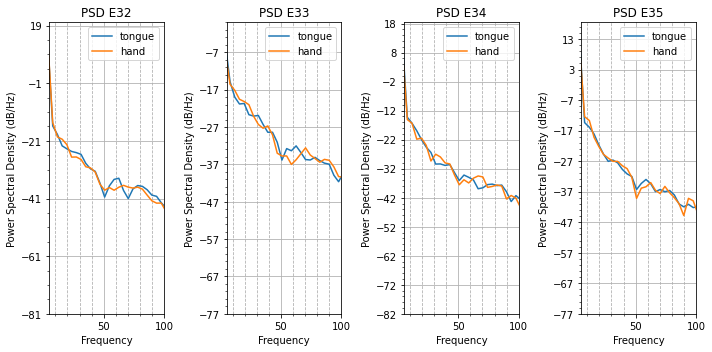

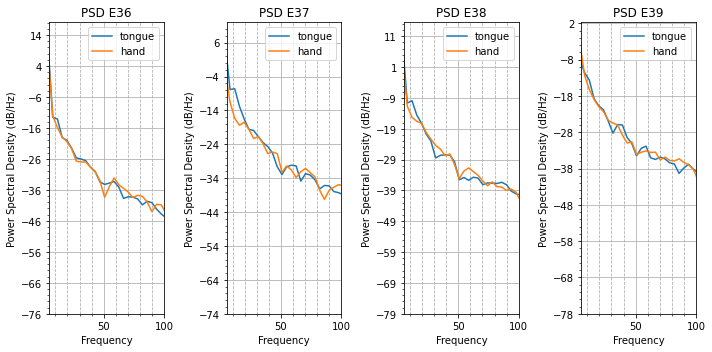

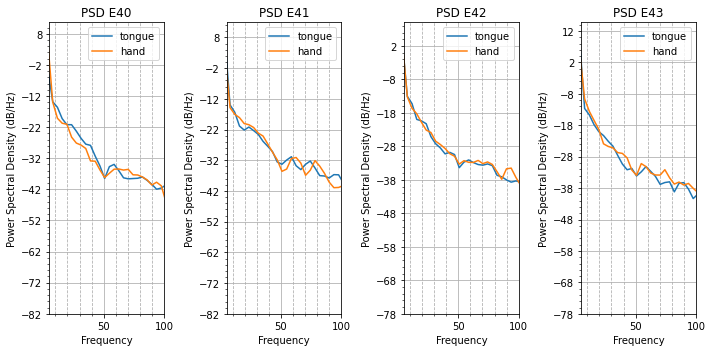

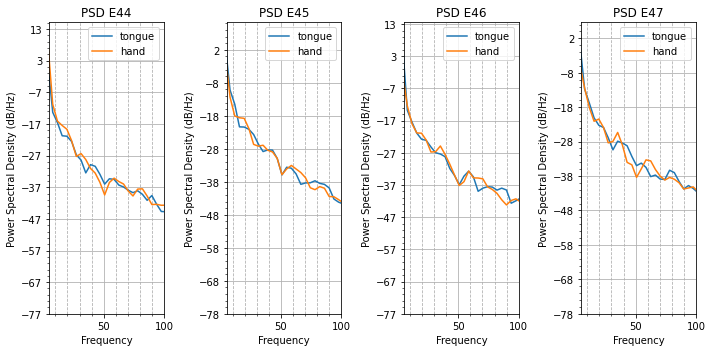

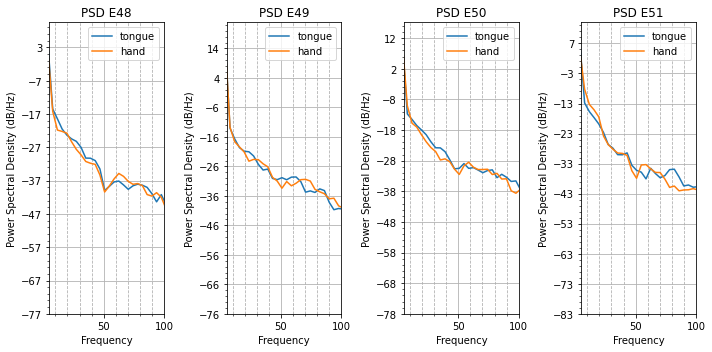

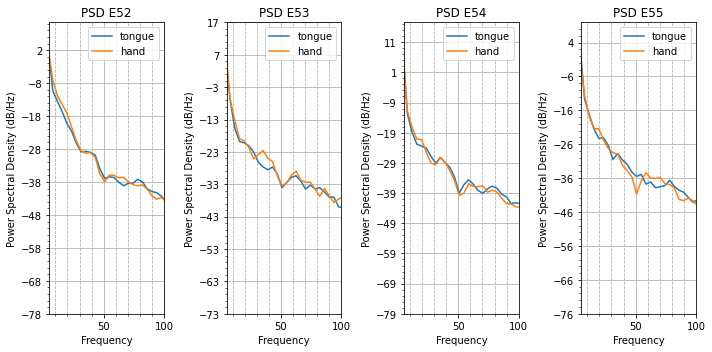

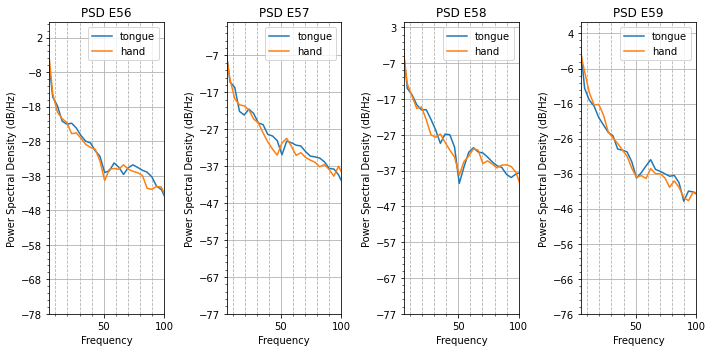

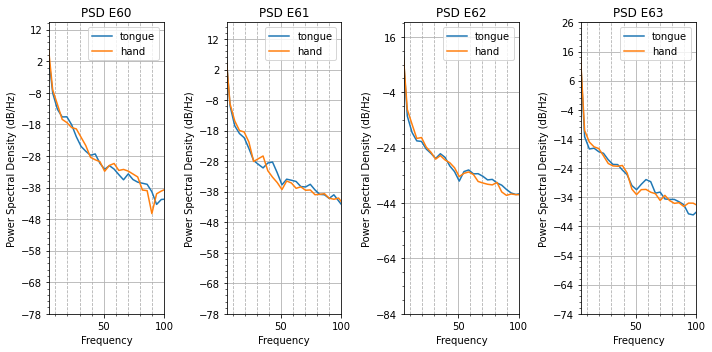

In [10]:
#from matplotlib.ticker import AutoMinorLocator, MultipleLocator
#minor = AutoMinorLocator()
for i in range(0,61, 4):
    
    

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,5))

    ax1.psd(np.mean(data_2[np.where(data["events"] == 1)[0], i, :], axis=0), Fs=1000, label="tongue")
    ax1.psd(np.mean(data_2[np.where(data["events"] == -1)[0], i, :], axis=0), Fs=1000, label="hand")
    #ax1.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")
    
    ax1.grid(which = "minor", linestyle='--', axis="x")
    ax1.legend()
    ax1.minorticks_on()
    ax1.set_xlim(5, 100)
    ax1.set_title("PSD E" + str(i))
    
    ax2.psd(np.mean(data_2[np.where(data["events"] == 1)[0], i+1, :], axis=0), Fs=1000, label="tongue")
    ax2.psd(np.mean(data_2[np.where(data["events"] == -1)[0], i+1, :], axis=0), Fs=1000, label="hand")
    #ax2.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")
    
    ax2.grid(which = "minor", linestyle='--', axis="x")
    ax2.legend()
    ax2.minorticks_on()
    ax2.set_xlim(5, 100)
    ax2.set_title("PSD E" + str(i+1))
    
    ax3.psd(np.mean(data_2[np.where(data["events"] == 1)[0], i+2, :], axis=0), Fs=1000, label="tongue")
    ax3.psd(np.mean(data_2[np.where(data["events"] == -1)[0], i+2, :], axis=0), Fs=1000, label="hand")
    #ax3.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")
    
    ax3.grid(which = "minor", linestyle='--', axis="x")
    ax3.legend()
    ax3.minorticks_on()
    ax3.set_xlim(5, 100)
    ax3.set_title("PSD E" + str(i+2))
    
    plot.minorticks_on()
    
    ax4.psd(np.mean(data_2[np.where(data["events"] == 1)[0], i+3, :], axis=0), Fs=1000, label="tongue")
    ax4.psd(np.mean(data_2[np.where(data["events"] == -1)[0], i+3, :], axis=0), Fs=1000, label="hand")
    #ax4.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")
    
    ax4.grid(which = "minor", linestyle='--', axis="x")
    ax4.legend()
    ax4.minorticks_on()
    ax4.set_xlim(5, 100)
    ax4.set_title("PSD E" + str(i+3))
    
    plot.tight_layout()
    
    

<Figure size 432x288 with 0 Axes>

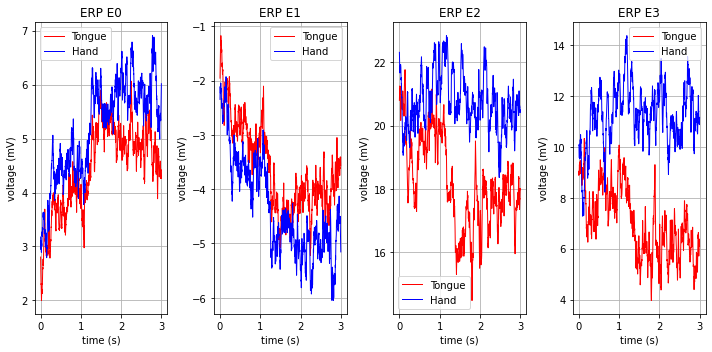

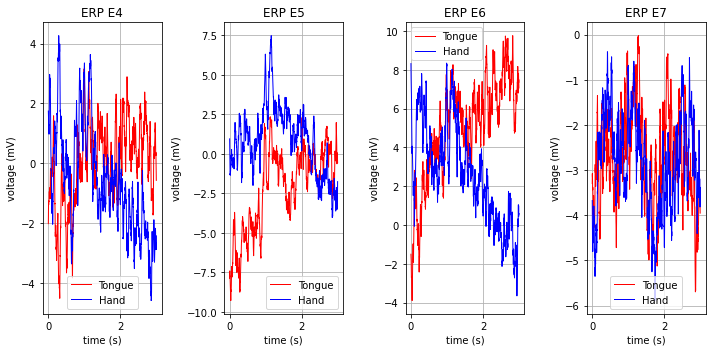

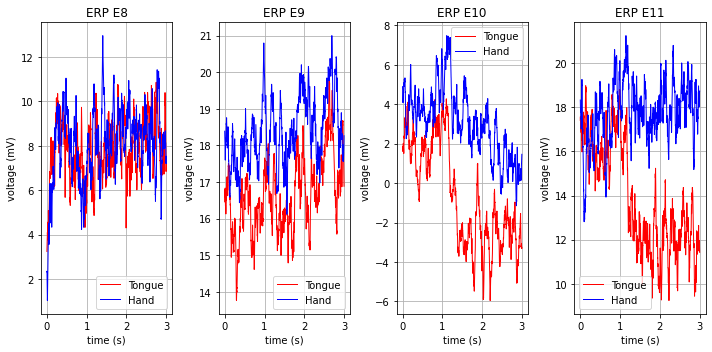

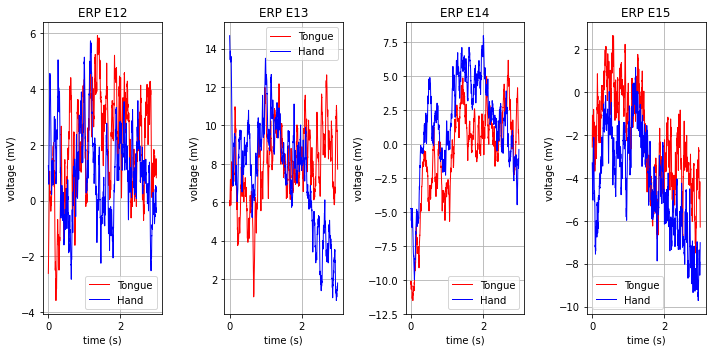

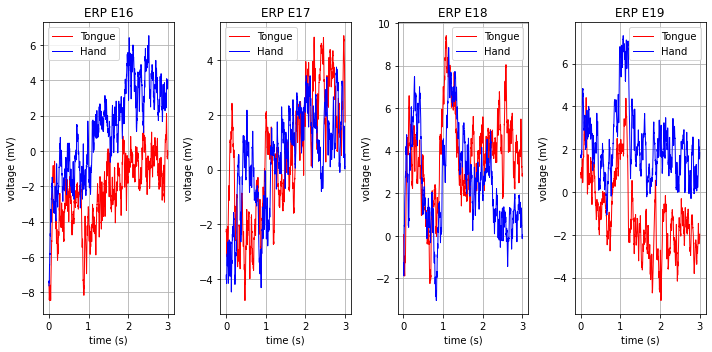

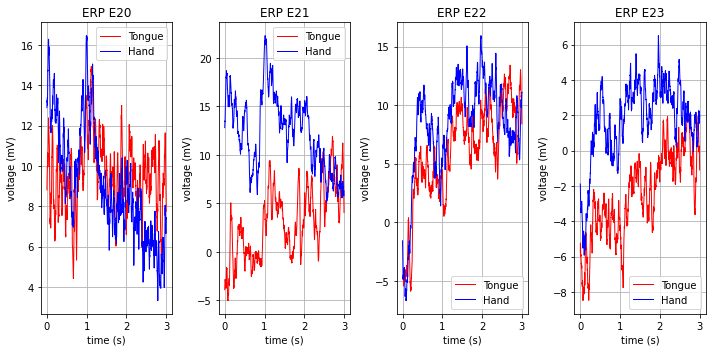

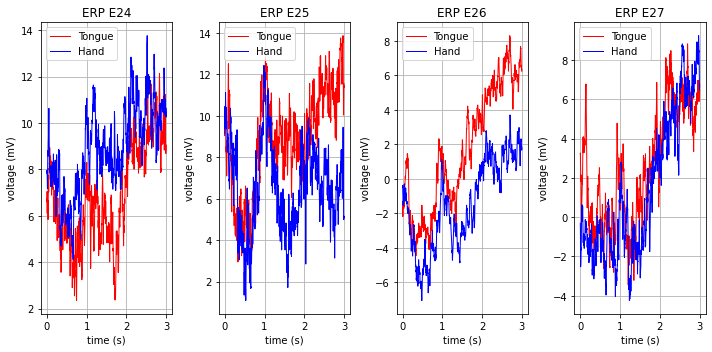

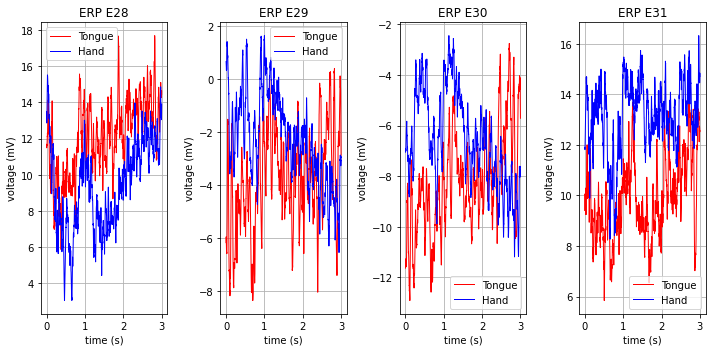

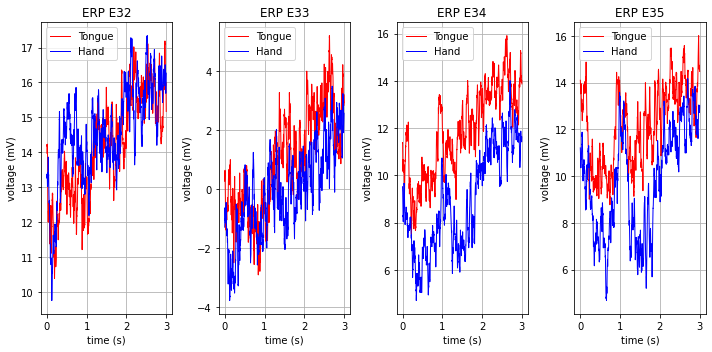

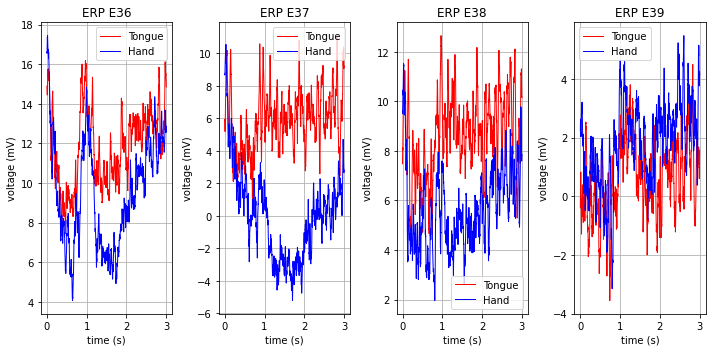

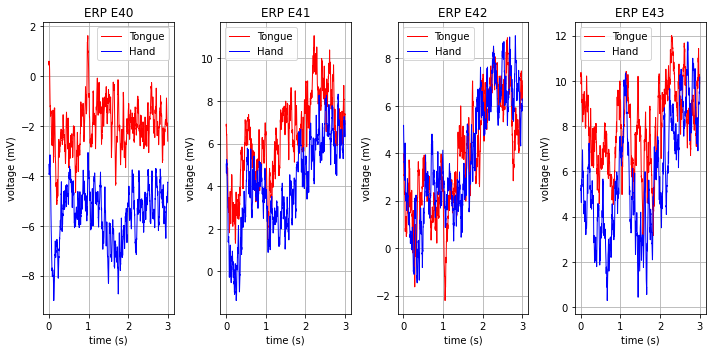

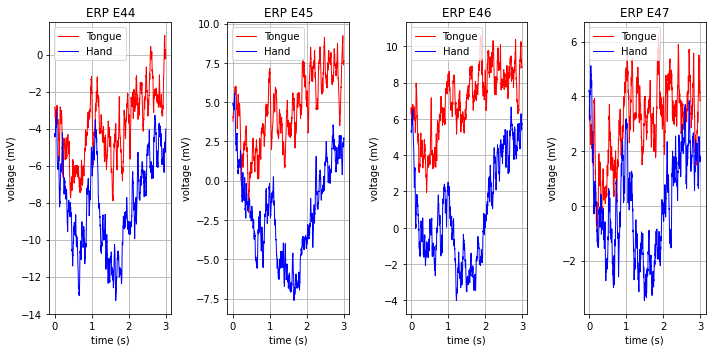

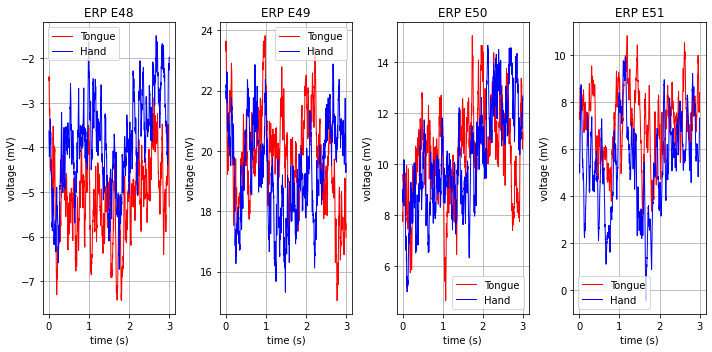

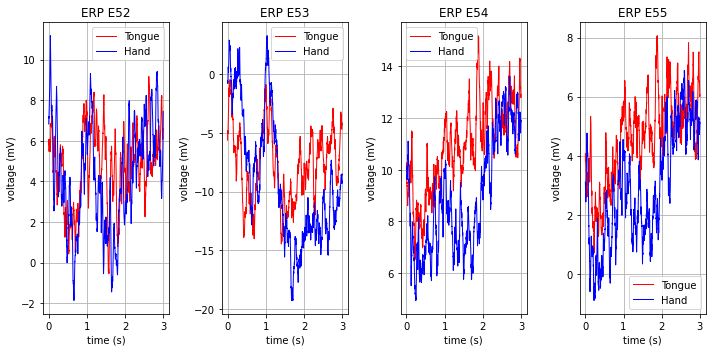

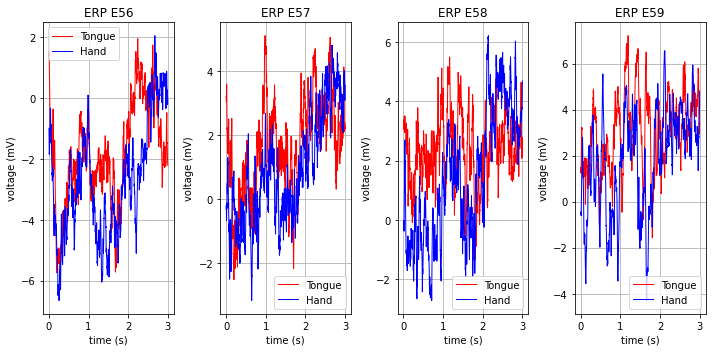

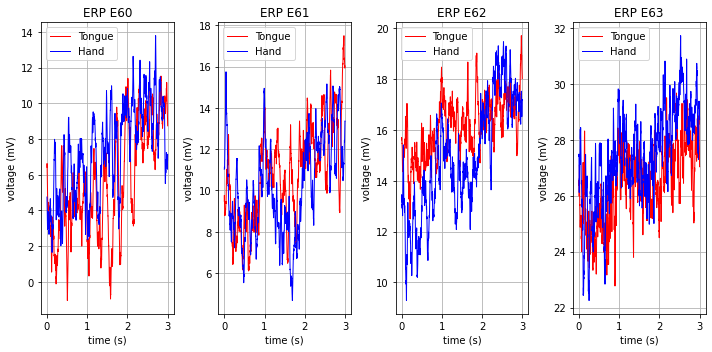

In [11]:
#for i in range(0, 3):


for i in range(0,61,4):
    #figure(figsize=(20,100))
    mysignals1 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["events"] == 1)[0], i, :], axis=0), 'color':'r', 'linewidth':1},
                {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["events"] == -1)[0], i, :], axis=0), 'color':'b', 'linewidth':1},
                
                ]

    mysignals2 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["events"] == 1)[0], i+1, :], axis=0), 'color':'r', 'linewidth':1},
                {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["events"] == -1)[0], i+1, :], axis=0), 'color':'b', 'linewidth':1},
               ]

    mysignals3 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["events"] == 1)[0], i+2, :], axis=0), 'color':'r', 'linewidth':1},
                {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["events"] == -1)[0], i+2, :], axis=0), 'color':'b', 'linewidth':1},
                ]

    mysignals4 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["events"] == 1)[0], i+3, :], axis=0), 'color':'r', 'linewidth':1},
                {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["events"] == -1)[0], i+3, :], axis=0), 'color':'b', 'linewidth':1},
                 ]

    plot.tight_layout()

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,5))
    for signal in mysignals1:
        ax1.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

    # Enable legend
    ax1.legend()
    ax1.grid()
    ax1.set(xlabel='time (s)', ylabel='voltage (mV)')
    ax1.set_title("ERP E" + str(i))
    #plt.show()
    #plot.tight_layout()

    for signal in mysignals2:
        ax2.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

    # Enable legend
    ax2.legend()
    ax2.grid()
    ax2.set(xlabel='time (s)', ylabel='voltage (mV)')
    ax2.set_title("ERP E" + str(i+1))

    for signal in mysignals3:
        ax3.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

    # Enable legend
    ax3.legend()
    ax3.grid()
    ax3.set(xlabel='time (s)', ylabel='voltage (mV)')
    ax3.set_title("ERP E" + str(i+2))

    for signal in mysignals4:
        ax4.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

    # Enable legend
    ax4.legend()
    ax4.grid()
    ax4.set(xlabel='time (s)', ylabel='voltage (mV)')
    ax4.set_title("ERP E" + str(i+3))

    plot.tight_layout()
    #plt.show()